# Линейные модели в машинном обучении

**Описание проекта**

IT-компания выполняет на заказ проекты по машинному обучению. Обратился фермер, владелец молочного хозяйства. Он хочет купить коров, чтобы расширить поголовье стада. Для этого он заключил контракт с ассоциацией пастбищ.
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая корова давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. Ассоциация пастбищ готова предоставить подробные данные о своих коровах. Нужно создать две прогнозные модели для отбора коров в поголовье:

- Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью модели нужно отобрать коров по двум критериям:

- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Описание данных**

Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ` (Энергетическая кормовая единица) — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Признаки в датасете `ferma_main.csv` можно разделить на группы.
- Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
- Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
- Характеристика пастбища: `Тип пастбища`.
- Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных

In [ ]:
!pip install phik

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import phik
import scipy.stats #, math

from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, \
recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler #, MinMaxScaler
#from sklearn.multiclass import OneVsRestClassifier

In [ ]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
except:
    ferma_main = pd.read_csv('C:/Users/Student/Desktop/ferma_main.csv', sep=';', decimal=',')
    ferma_dad = pd.read_csv('C:/Users/Student/Desktop/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('C:/Users/Student/Desktop/cow_buy.csv', sep=';', decimal=',')

In [ ]:
def dfinfo(df):
    df.info()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')#.str.replace(',','')
    display(df.head())

dfinfo(ferma_main)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


В датасете `ferma_main` 634 строки, пропусков нет.

In [ ]:
dfinfo(ferma_dad)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


В датасете `ferma_dad` 629 строк, пропусков нет.

In [ ]:
dfinfo(cow_buy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


В датасете `cow_buy` 20 строк, пропусков нет.

Во всех 3 датасетах переименовали столбцы: в нижнем регистре и заменили пробел знаком _.

##  Предобработка данных

In [ ]:
def predobr(df):
    print('Пропуски:')
    print(df.isna().sum())
    print('Дубликатов', df.duplicated().sum())
    if df.duplicated().sum()>0:
        df = df.drop_duplicates().reset_index(drop=True)
        print('Дубликатов после удаления', df.duplicated().sum())

predobr(ferma_main)

Пропуски:
id                                       0
удой,_кг                                 0
эке_(энергетическая_кормовая_единица)    0
сырой_протеин,_г                         0
спо_(сахаро-протеиновое_соотношение)     0
порода                                   0
тип_пастбища                             0
порода_папы_быка                         0
жирность,%                               0
белок,%                                  0
вкус_молока                              0
возраст                                  0
dtype: int64
Дубликатов 5
Дубликатов после удаления 0


In [ ]:
ferma_main['порода'].sort_values().unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [ ]:
ferma_main['тип_пастбища'].sort_values().unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [ ]:
ferma_main.loc[ferma_main['тип_пастбища']=='Равнинные','тип_пастбища'] = 'Равнинное'
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()
ferma_main['тип_пастбища'].sort_values().unique()

array(['равнинное', 'холмистое'], dtype=object)

In [ ]:
ferma_main['порода_папы_быка'].sort_values().unique()

array(['Айдиал', 'Айдиалл', 'Соверин'], dtype=object)

In [ ]:
ferma_main.loc[ferma_main['порода_папы_быка']=='Айдиалл','порода_папы_быка'] = 'Айдиал'
ferma_main['порода_папы_быка'].sort_values().unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [ ]:
predobr(ferma_dad)

Пропуски:
id          0
имя_папы    0
dtype: int64
Дубликатов 0


В датасете `ferma_main` удалили 5 явных дубликатов и исправили неявные дубликаты в столбцах `тип_пастбища` и `порода_папы_быка`, а также назвали типы пастбищ в нижнем регистре, как в `cow_buy`.

In [ ]:
ferma_dad['имя_папы'].sort_values().unique()

array(['Барин', 'Буйный', 'Геркулес', 'Соловчик'], dtype=object)

В датасете `ferma_dad` явные и неявные дубликаты не обнаружены.

In [ ]:
predobr(cow_buy)

Пропуски:
порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64
Дубликатов 4
Дубликатов после удаления 0


In [ ]:
cow_buy['порода'].sort_values().unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [ ]:
cow_buy['тип_пастбища'].sort_values().unique()

array(['равнинное', 'холмистое'], dtype=object)

In [ ]:
cow_buy['порода_папы_быка'].sort_values().unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [ ]:
cow_buy['имя_папы'].sort_values().unique()

array(['Барин', 'Буйный', 'Геркулес', 'Соловчик'], dtype=object)

В датасете `cow_buy` удалили 4 явных дубликата, неявные дубликаты не обнаружены.

## Исследовательский анализ данных

### Анализ количественных признаков для `ferma_main`

,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),"жирность,%","белок,%"
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


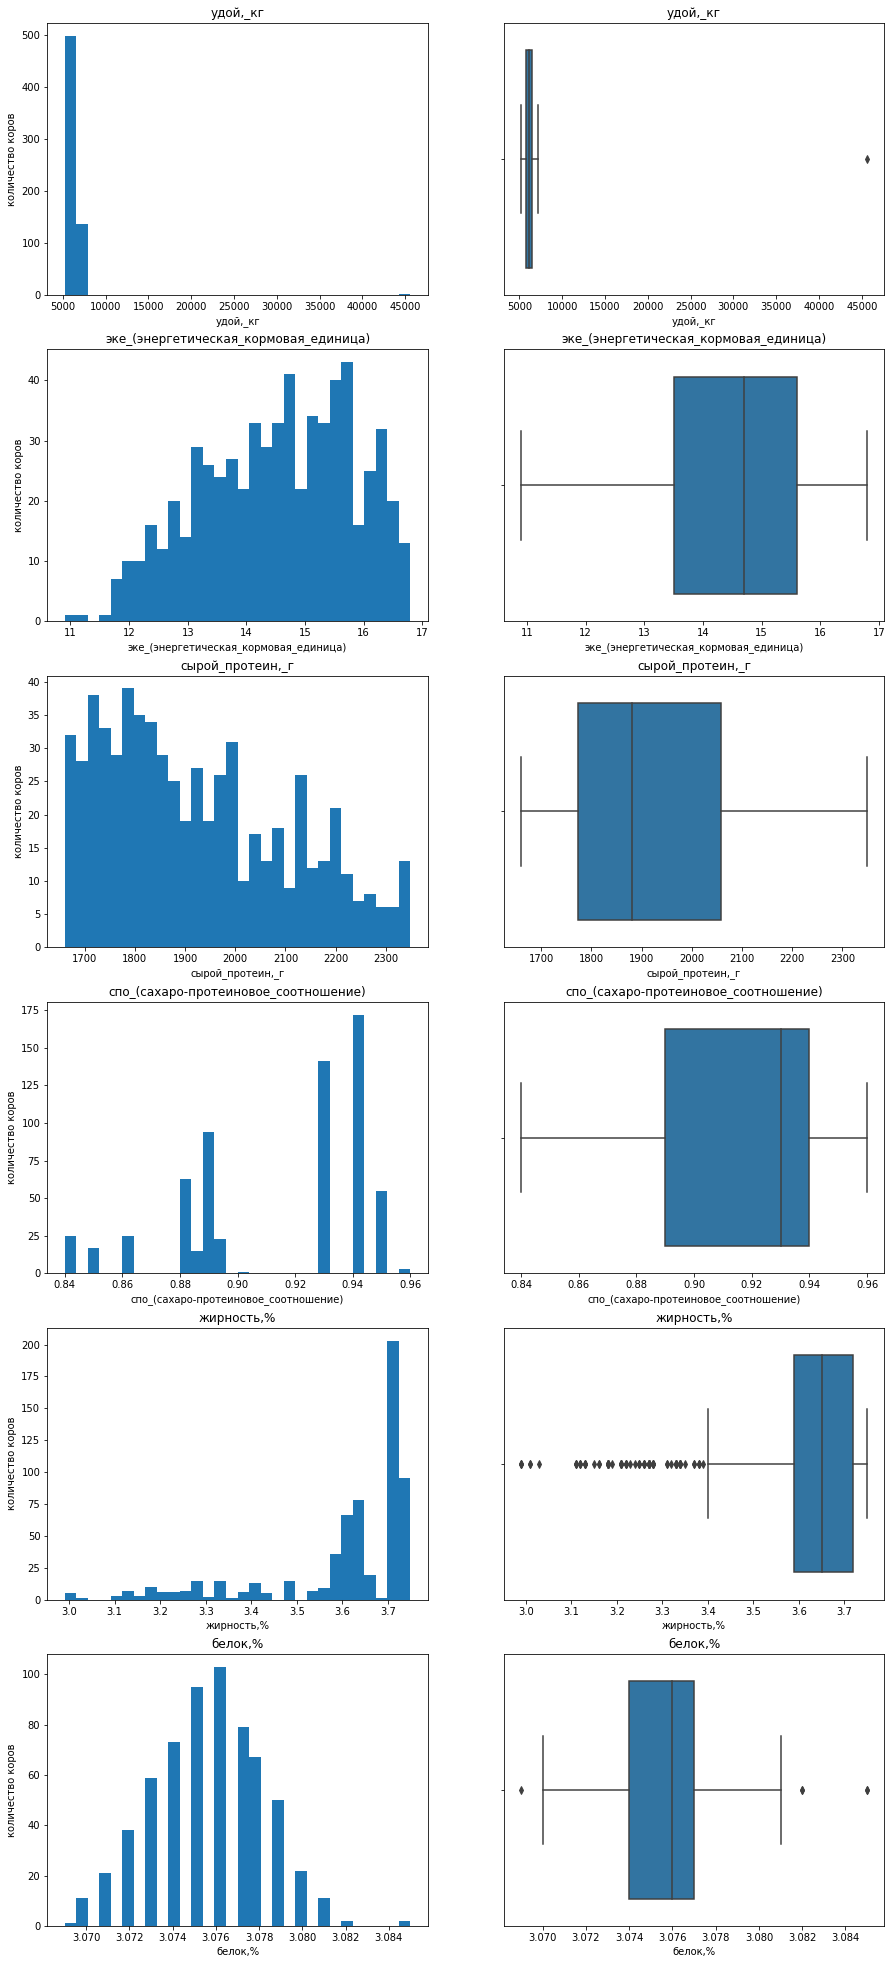

In [ ]:
def issl_analiz(df, x):
    display(df.describe())

    list_col = df.select_dtypes(exclude='object').columns

    fig,axes = plt.subplots(nrows=len(list_col), ncols=2, figsize=(15, x))
    i=0
    for col in list_col:
        df[col].plot(kind='hist', x=col, ax=axes[i][0], title=col, bins=30).set(ylabel='количество коров', xlabel=col)
        try:
            sns.boxplot(x=col, data=df, ax=axes[i][1]).set(title=col)
        except:
            df[col].plot(kind='box', ax=axes[i][1], title=col, vert=False, rot=90, ylabel='', xlabel='')
        i+=1

plt.show()

issl_analiz(ferma_main.drop('id', axis=1), 35)

In [ ]:
ferma_main[ferma_main['удой,_кг']>10000]

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Посмотрим выброс в столбце Удой. Всего 1 корова с нереально большим удоем, то ли цифра лишняя, то ли удой не за 1 год, а за всю её жизнь. Удаляем, т.к. неизвестно как исправить.

count     633.000000
mean     6124.736177
std       474.172345
min      5204.000000
25%      5751.000000
50%      6130.000000
75%      6501.000000
max      7222.000000
Name: удой,_кг, dtype: float64

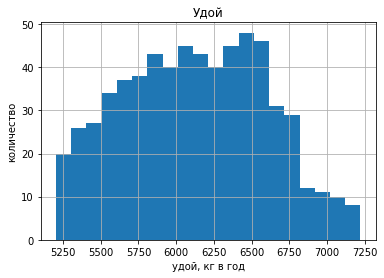

In [ ]:
ferma_main = ferma_main[ferma_main['удой,_кг']<10000]
ferma_main['удой,_кг'].hist(bins=20)
plt.xlabel('удой, кг в год')
plt.ylabel('количество')
plt.title('Удой')
ferma_main['удой,_кг'].describe()

Теперь распределение Удоя похоже на нормальное. Дальних выбросов у признаков нет, у признака Жирность большой левый хвост (большинство коров дают молоко с высокой жирностью). СПО распределено с "пробелами" (например, с соотношением 0,92 нет образцов молока). Признак Белок с небольшими "пробелами" нормально распределён. Эти "пробелы" потому, что СПО корма и процент белка в молоке принимают всего несколько вариантов значений на наши более 600 строк:

In [ ]:
ferma_main['спо_(сахаро-протеиновое_соотношение)'].sort_values().unique()

array([0.84 , 0.85 , 0.86 , 0.88 , 0.885, 0.89 , 0.895, 0.9  , 0.93 ,
       0.94 , 0.95 , 0.96 ])

In [ ]:
ferma_main['белок,%'].sort_values().unique()

array([3.069, 3.07 , 3.071, 3.072, 3.073, 3.074, 3.075, 3.076, 3.077,
       3.078, 3.079, 3.08 , 3.081, 3.082, 3.085])

### Анализ категориальных признаков для `ferma_main`

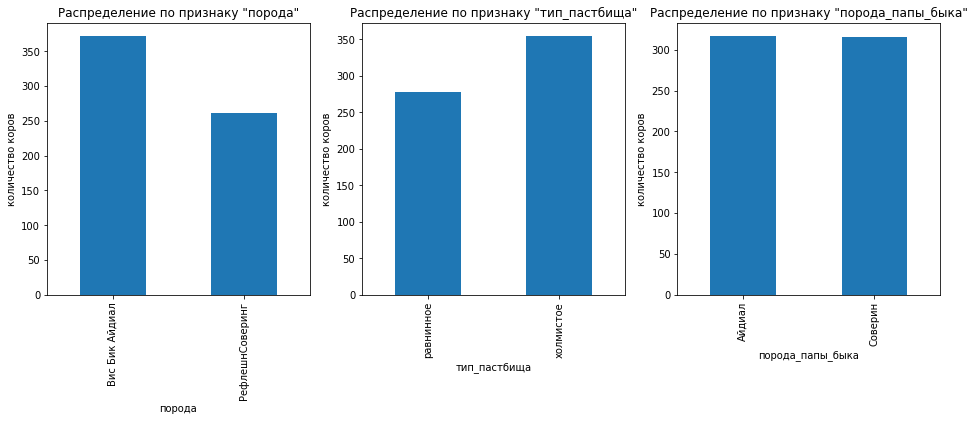

In [ ]:
list_bar = ['порода', 'тип_пастбища', 'порода_папы_быка']
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(16, 5))
i=0
for col in list_bar:
    ferma_main.pivot_table(index=col, values='id', aggfunc='count').plot(kind='bar', legend=False, \
                    xlabel=col, ylabel='количество коров', title=f'Распределение по признаку "{col}"', ax=axes[i])
    i+=1
plt.show()

Пород коров всего 2, большинство породы Вис Бик Айдиал. Типов пастбищ 2, холмистых больше, чем равнинных. Пап-быков обеих пород примерно одиноковое количество. Как видно было ещё в Загрузке данных, порода коровы не обязательно совпадает с папиной.

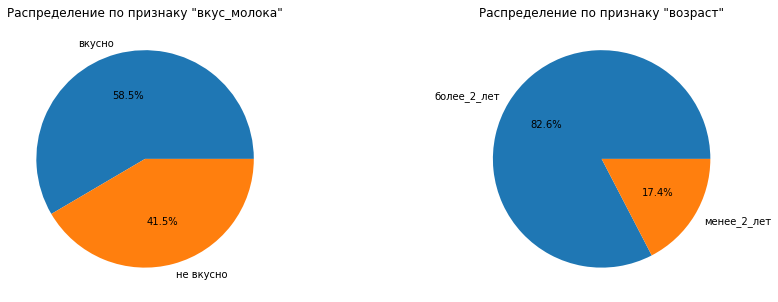

In [ ]:
list_pie = ['вкус_молока', 'возраст']
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))
i=0
for col in list_pie:
    ferma_main.pivot_table(index=col, values='id', aggfunc='count').plot(kind='pie', y='id', legend=False,\
                        autopct='%1.1f%%', ylabel='', title=f'Распределение по признаку "{col}"', ax=axes[i])
    i+=1
plt.show()

Вкусного молока 58,5%. Коров старше 2 лет 82,6%.

### Анализ категориальных признаков для `ferma_dad`

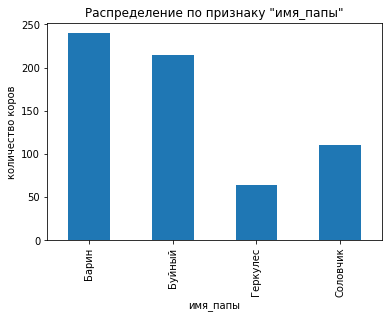

In [ ]:
ferma_dad.pivot_table(index='имя_папы', values='id', aggfunc='count').plot(kind='bar', legend=False, \
                            xlabel='имя_папы', ylabel='количество коров', title='Распределение по признаку "имя_папы"')
plt.show()

Всего 4 быка, больше всего "дочек" у Барина, меньше всего у Геркулеса.

### Анализ количественных признаков для `cow_buy`

,"текущая_жирность,%","текущий_уровень_белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


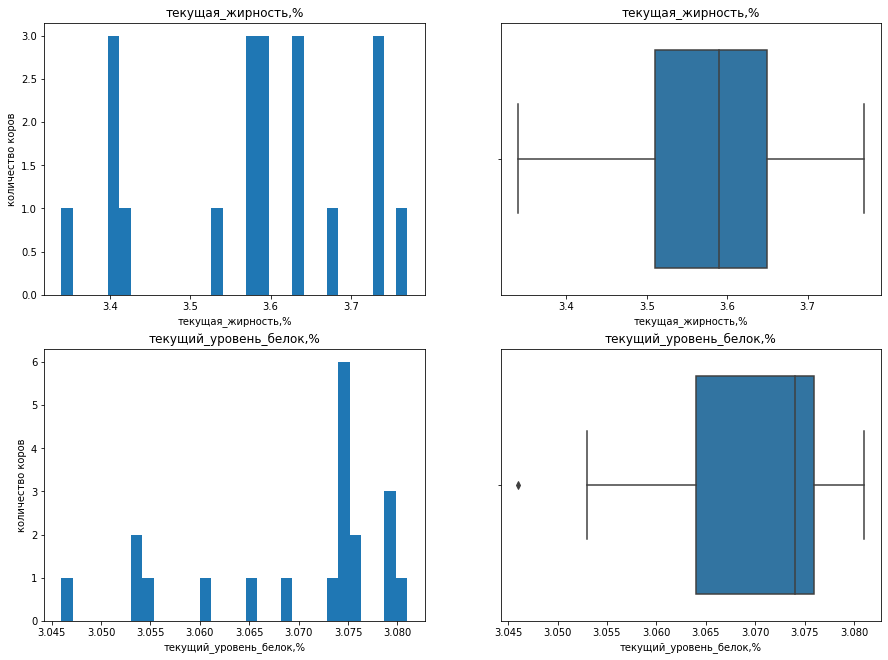

In [ ]:
issl_analiz(cow_buy, 11)

Жирность и уровень белка распределены неравномерно, с некоторыми значениями (например, жирность 3,5%) вообще нет такого молока. Это, видимо, потому, что в этом датасете всего 20 коров.

### Анализ категориальных признаков для `cow_buy`

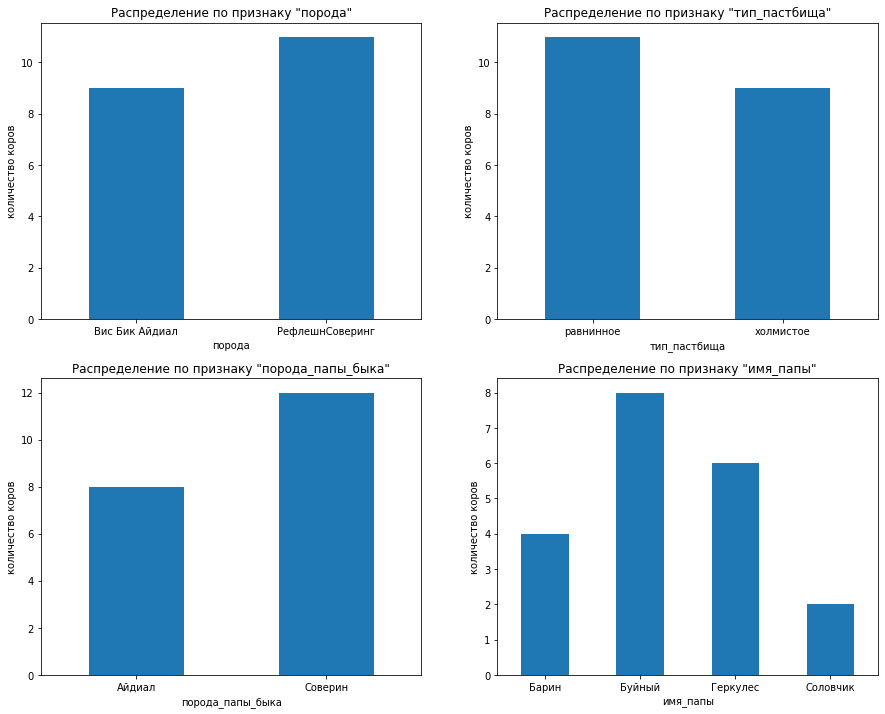

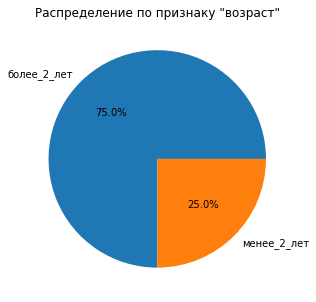

In [ ]:
list_bar = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы']
fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(15, 12))
i=0
j=0
for col in list_bar:
    cow_buy.pivot_table(index=col, values='текущая_жирность,%', aggfunc='count').plot(kind='bar', legend=False, \
                    xlabel=col, ylabel='количество коров', title=f'Распределение по признаку "{col}"', ax=axes[i][j], rot=0)
    if j==1:
        j-=1
        i+=1
    else:
        j+=1
plt.show()

cow_buy.pivot_table(index='возраст', aggfunc='count').plot(kind='pie', y='текущая_жирность,%', legend=False, \
                                  figsize=(5, 5), autopct='%1.1f%%', ylabel='', title='Распределение по признаку "возраст"')
plt.show()

Пород коров тоже 2, большинство породы Рефлешн Соверинг. Типов пастбищ 2, равнинных больше, чем холмистых. Пап-быков породы Соверин большинство, больше всего "дочек" у быка Буйного, меньше всего у Соловчика. Коров старше 2 лет 75%.

Явный выброс (в признаке Удой датасета ferma_main) мы убрали, остальные данные пока оставим как есть.

## Корреляционный анализ

### Коэффициенты корреляции между всеми признаками в `ferma_main`

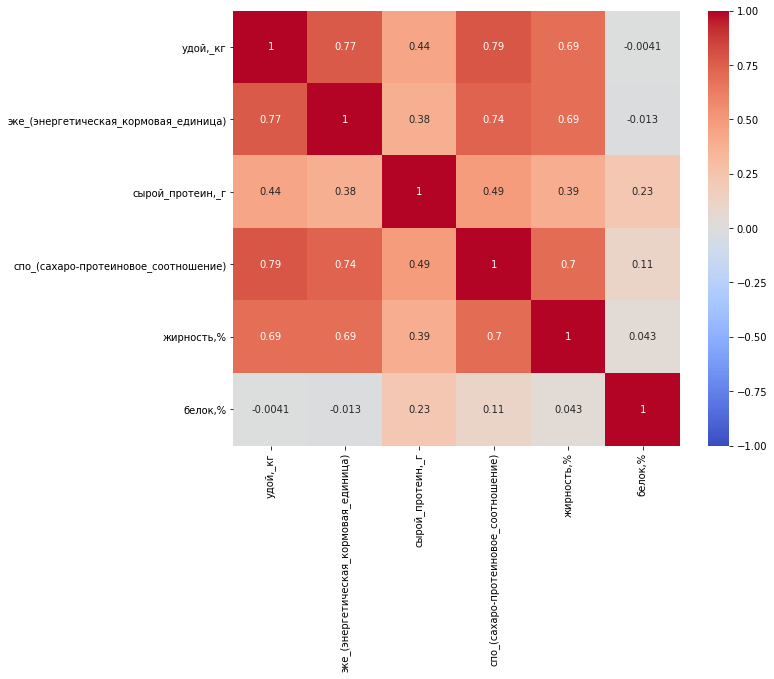

In [ ]:
#display(stats.spearmanr(ferma_main.drop('id', axis=1)))
plt.figure(figsize = (10,8))
sns.heatmap(ferma_main.drop('id', axis=1).corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

Из расчёта коэффициентов корреляции убрали id (это просто номер коровы, он не должен коррелировать с количественными показателями). Удой положительно коррелирует с ЭКЕ и СПО (сильная связь), жирностью (средняя связь), содержанием сырого протеина (слабая связь). От содержания белка зависимости нет. Также связаны между собой ЭКЕ и СПО (сильная связь), ЭКЕ и жирность, СПО и жирность (средняя связь).

Т.е. чем питательнее (ЭКЕ) и слаще (СПО) корм, тем больше молока дают коровы.

interval columns not set, guessing: ['удой,_кг', 'эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)', 'жирность,%', 'белок,%']


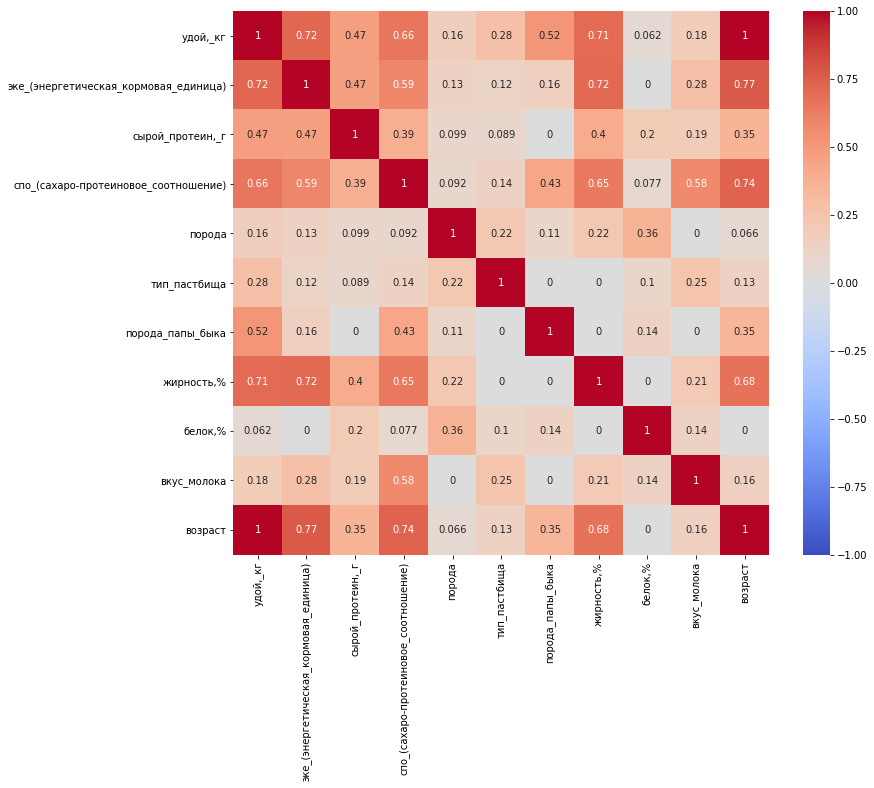

In [ ]:
#ferma_main.drop('id', axis=1).phik_matrix()

plt.figure(figsize = (12,10))
sns.heatmap(ferma_main.drop('id', axis=1).phik_matrix(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

Коэффициенты корреляции Фи между количественными признаками не такие же, как Спирмена, но похожи (если связь есть, то оба варианта её показывают).

Очень сильная связь между удоем и возрастом коровы (из других категориальных признаков на удои влияет порода папы-быка - средняя связь). На вкус молока заметно влияет СПО (средняя связь). Также сильная связь у возраста с ЭКЕ и СПО.

Между собой категориальные признаки связаны слабо или никак.

### Диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков в `ferma_main`

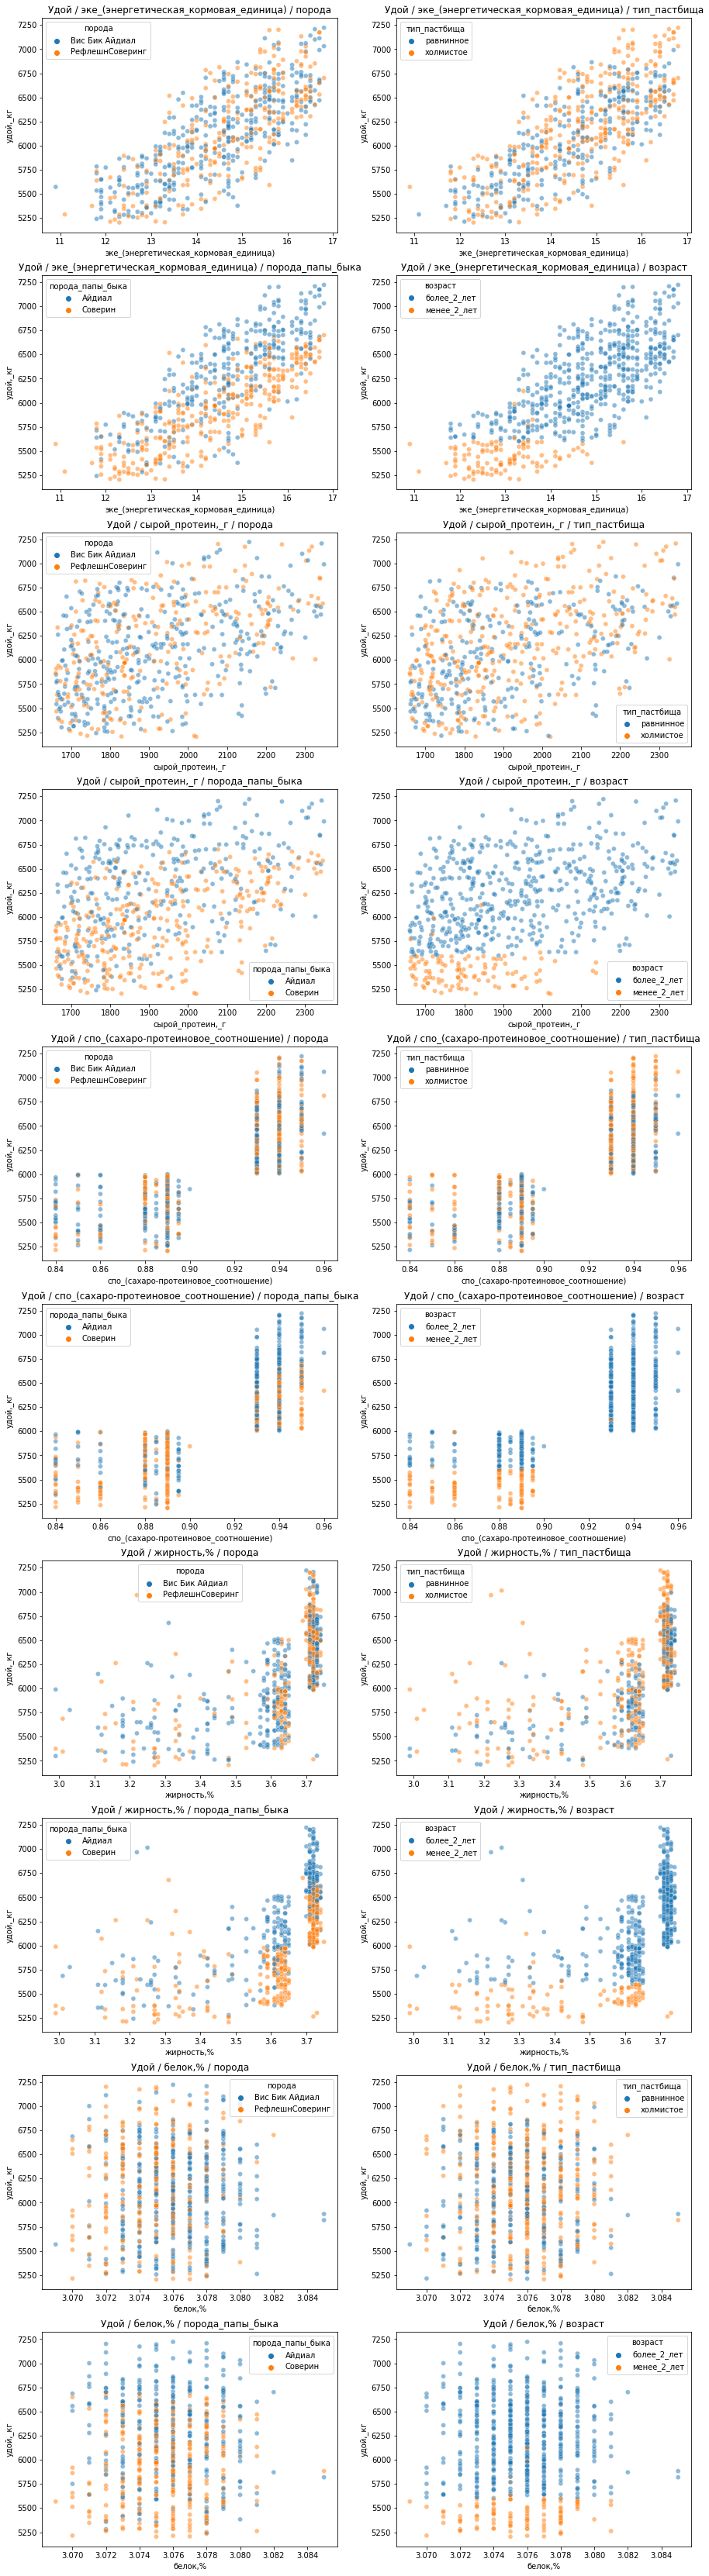

In [ ]:
list_col = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)', \
            'жирность,%', 'белок,%']
list_cat = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

fig,axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 60))
i=0
j=0
for col in list_col:
    for cat in list_cat:
        sns.scatterplot(data=ferma_main, x=col, y='удой,_кг', hue=cat, alpha=0.5, ax=axes[i][j])\
        .set(title=f'Удой / {col} / {cat}')
        if j==1:
            j-=1
            i+=1
        else:
            j+=1

plt.show()

### Выводы о взаимосвязи признаков

- Какой тип взаимосвязи между целевым и входными признаками?

Между **удоем** (целевой признак) и **ЭКЕ** прямая взаимосвязь (близкая к линейной, но не линейная), при этом для разных пород коров примерно одинаковая, для типов пастбищ тоже почти одинаковая (на холмистых удои чуть больше). У коров от папы-быка породы Айдиал удои сильнее увеличиваются с увеличением ЭКЕ. У коров возрастом до 2 лет удои вообще не растут с увеличением СПО, зато у старших 2 лет растут значительно.

Чёткой зависимости удоя от содержания в корме **сырого протеина** нет (слабая положительная связь).

Есть прямая связь между удоями и **СПО**, при этом СПО делится на 2 группы: 0,84-0,90 и 0,93-0,96. Между этими группами вообще нет точек (наверное, 2 вида кормов). В 1 группе (до СПО 0,90) удои менее 6000 кг, почти все удои свыше 6000 кг во 2 группе (СПО более 0,93).

Прямая связь между удоями и **жирностью молока**, причём у коров с большими удоями и жирность молока намного выше, и коров, дающих более жирное молоко, гораздо больше. При жирности менее 3,6% плотность точек на графике намного меньше и чёткой зависимости не видно.

Нет связи между удоями и содержанием **белка** (большинство точек в середине графика, а вообще бывают как большие, так и маленькие удои с любым процентом белка в молоке.

Значительно больше удои у коров, которым больше 2 лет (свыше 6200 кг бывает только у "старших"), заметно больше удои у "дочек" папы-быка породы Айдиал (на графиках отношения удоя ко всем числовым признакам).

- Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?

Нелинейную связь между удоями и ЭКЕ устраним, добавив новый признак "ЭКЕ в квадрате", между удоями и СПО - поделив СПО на 2 обнаруженные группы (до 0,92 и выше 0,92), будет новый категориальный бинарный признак.

- Наблюдается ли мультиколлинеарность между входными признаками?

Между входными признаками нет корреляции с коэффициентом от 0,9 и выше (который считается признаком мультиколинеарности), максимальный 0,75 между ЭКЕ и СПО (связь сильная, но не мультиколинеарность); также сильная связь у возраста с ЭКЕ и СПО.

## Обучение модели линейной регрессии

### Обучение модели 1

Используем в качестве целевого признак Удой, кг

In [ ]:
y = ferma_main['удой,_кг']

Отберём признаки, которые подходят для модели линейной регрессии, аргументируем выбор, опираясь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета:
- `id` коровы не нужен,
- `вкус_молока` тоже целевой признак, как и Удой, из входных признаков удаляем его,
- признаки `жирность,%` и `белок,%` являются показателями молока и на производство молока не влияют, тоже не нужны.

In [ ]:
X = ferma_main.drop(['id', 'удой,_кг', 'жирность,%', 'белок,%', 'вкус_молока'], axis=1)

Разбиваем данные на тренировочную и тестовую выборки

In [ ]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

Кодируем категориальные признаки с помощью `OneHotEncoder`

In [ ]:
try:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
except:
    encoder = OneHotEncoder(drop='first', sparse=False)


X_train_ohe = encoder.fit_transform(X_train[list_cat])
X_test_ohe = encoder.transform(X_test[list_cat])

encoder_col_names = encoder.get_feature_names_out()
encoder_col_names

array(['порода_РефлешнСоверинг', 'тип_пастбища_холмистое',
       'порода_папы_быка_Соверин', 'возраст_менее_2_лет'], dtype=object)

Масштабируем количественные признаки с помощью `StandardScaler`

In [ ]:
list_col = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)']
scaler = StandardScaler()

scaler.fit(X_train[list_col])
X_train_scaler = scaler.transform(X_train[list_col])
X_test_scaler = scaler.transform(X_test[list_col])

Обучим модель линейной регрессии на подготовленных данных

In [ ]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaler = pd.DataFrame(X_train_scaler, columns=list_col)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=list_col)

X_train = pd.concat([X_train_ohe, X_train_scaler], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaler], axis=1)

model_lr1  = LinearRegression()
model_lr1.fit(X_train, y_train)
predictions1 = model_lr1.predict(X_test)

Оценим качество модели на тестовой выборке: рассчитайте R², проанализируем остатки с помощью графиков

R2 LinearRegression модели 1 = 0.7526889845143689


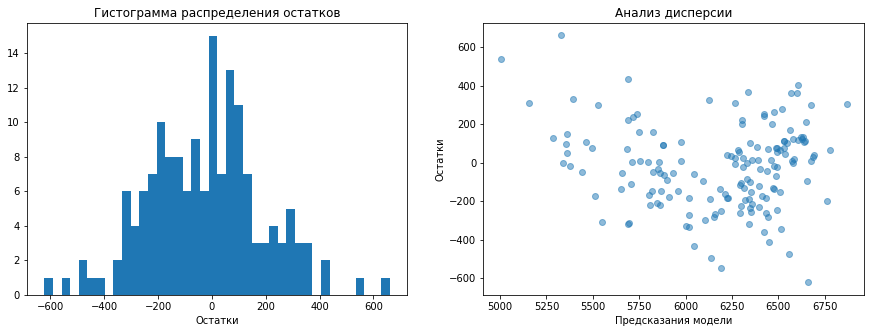

In [ ]:
r2 = r2_score(y_test, predictions1)
print("R2 LinearRegression модели 1 =", r2)

residuals = y_test - predictions1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].hist(residuals, bins=40)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions1, y=residuals, alpha=0.5)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Выводы по модели 1:**
- значение R² модели 0.75, при максимуме 1 это маловато, есть куда улучшать;
- выводы из анализа остатков - распределение остатков близко к нормальному, но при увеличении bins видны "лишние" пики и выбросы;
- нужны ли дополнительные исследования - да, попробуем увеличить точность предсказаний.

### Обучение модели 2

Устраним нелинейную связь между удоями и СПО - поделим СПО на 2 группы (до 0,92 и выше 0,92) и добавим категориальный бинарный признак:

In [ ]:
ferma_main.loc[ferma_main['спо_(сахаро-протеиновое_соотношение)']<0.92, 'спо_бинарное'] = 'менее_0.92'
ferma_main.loc[ferma_main['спо_(сахаро-протеиновое_соотношение)']>0.92, 'спо_бинарное'] = 'более_0.92'

#ferma_main['СПО_бинарное'].unique()
ferma_main['спо_бинарное'].value_counts()

более_0.92    370
менее_0.92    263
Name: спо_бинарное, dtype: int64

Устраним нелинейную связь между удоями и ЭКЕ, добавив новый признак "ЭКЕ в квадрате":

In [ ]:
ferma_main['эке_в_квадрате'] = ferma_main['эке_(энергетическая_кормовая_единица)']**2

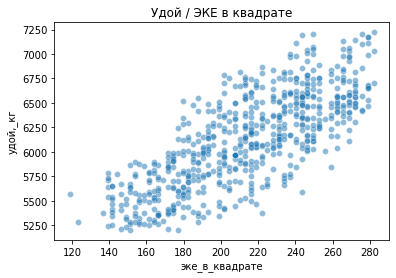

In [ ]:
sns.scatterplot(data=ferma_main, x='эке_в_квадрате', y='удой,_кг', alpha=0.5).set(title='Удой / ЭКЕ в квадрате')
plt.show()

Повторение шагов для обучения модели 2:

In [ ]:
X = ferma_main.drop(['id', 'удой,_кг', 'жирность,%', 'белок,%', 'вкус_молока', 'эке_(энергетическая_кормовая_единица)', \
                     'спо_(сахаро-протеиновое_соотношение)'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 633
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   сырой_протеин,_г  633 non-null    int64  
 1   порода            633 non-null    object 
 2   тип_пастбища      633 non-null    object 
 3   порода_папы_быка  633 non-null    object 
 4   возраст           633 non-null    object 
 5   спо_бинарное      633 non-null    object 
 6   эке_в_квадрате    633 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 39.6+ KB


In [ ]:
def learn_model_lin(X, y, list_cat, list_col, i=''): # функция обучения модели линейной регрессии с R2 и графиками
    RANDOM_STATE = 42
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

    try:
        encoder = OneHotEncoder(drop='first', sparse_output=False)
    except:
            encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[list_cat])
    X_test_ohe = encoder.transform(X_test[list_cat])
    try:
        encoder_col_names = encoder.get_feature_names()
    except:
        encoder_col_names = encoder.get_feature_names_out()
    scaler = StandardScaler()
    scaler.fit(X_train[list_col])
    X_train_scaler = scaler.transform(X_train[list_col])
    X_test_scaler = scaler.transform(X_test[list_col])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaler = pd.DataFrame(X_train_scaler, columns=list_col)
    X_test_scaler = pd.DataFrame(X_test_scaler, columns=list_col)

    X_train = pd.concat([X_train_ohe, X_train_scaler], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaler], axis=1)

    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

    r2 = r2_score(y_test, predictions)
    print(f'R2 LinearRegression модели {i} =', r2)

    residuals = y_test - predictions

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    axes[0].hist(residuals, bins=40)
    axes[0].set_title(f'Гистограмма распределения остатков модели {i}')
    axes[0].set_xlabel(f'Остатки модели {i}')

    axes[1].scatter(x=predictions, y=residuals, alpha=0.5)
    axes[1].set_xlabel(f'Предсказания модели {i}')
    axes[1].set_ylabel(f'Остатки модели {i}')
    axes[1].set_title(f'Анализ дисперсии модели {i}')
    plt.show()
    return encoder, scaler, model_lr, predictions

R2 LinearRegression модели 2 = 0.7903877940199926


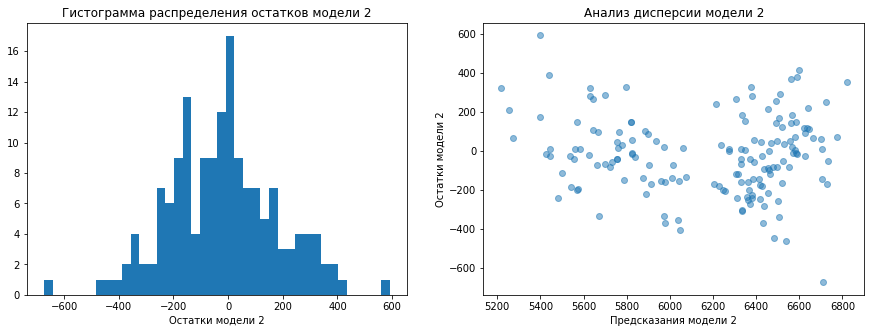

In [ ]:
list_cat = list_cat+['спо_бинарное']
list_col = ['сырой_протеин,_г', 'эке_в_квадрате']

encoder2, scaler2, model_lr2, predictions2 = learn_model_lin(X, y, list_cat, list_col, 2)

**Выводы по модели 2:**
- значение R² модели 0.79, это лучше, чем модель 1;
- выводы из анализа остатков - распределение остатков ближе к нормальному, чем у модели 1, но при увеличении bins тоже видны "лишние" пики и небольшие выбросы; интервал разброса предсказаний на диаграмме дисперсии сократился слева (а справа немного увеличился);
- нужны ли дополнительные исследования - да, попробуем ещё увеличить точность предсказаний.

### Обучение модели 3

Добавим признак Имя Папы из файла `ferma_dad.csv`, соединив его с остальными данными `ferma_main.csv` по ключу:

In [ ]:
ferma_main = ferma_main.merge(ferma_dad, on='id', how='left')
ferma_main.info()
ferma_main.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     633 non-null    int64  
 1   удой,_кг                               633 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  633 non-null    float64
 3   сырой_протеин,_г                       633 non-null    int64  
 4   спо_(сахаро-протеиновое_соотношение)   633 non-null    float64
 5   порода                                 633 non-null    object 
 6   тип_пастбища                           633 non-null    object 
 7   порода_папы_быка                       633 non-null    object 
 8   жирность,%                             633 non-null    float64
 9   белок,%                                633 non-null    float64
 10  вкус_молока                            633 non-null    object 
 11  возрас

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,спо_бинарное,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,менее_0.92,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,менее_0.92,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,менее_0.92,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,менее_0.92,163.84,Барин


Повторение шагов для обучения модели 3 (новые признаки для устранения нелинейности между удоем и ЭКЕ, СПО у нас уже есть):

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   сырой_протеин,_г  633 non-null    int64  
 1   порода            633 non-null    object 
 2   тип_пастбища      633 non-null    object 
 3   порода_папы_быка  633 non-null    object 
 4   возраст           633 non-null    object 
 5   спо_бинарное      633 non-null    object 
 6   эке_в_квадрате    633 non-null    float64
 7   имя_папы          633 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 44.5+ KB

R2 LinearRegression модели 3 = 0.8023577428031077


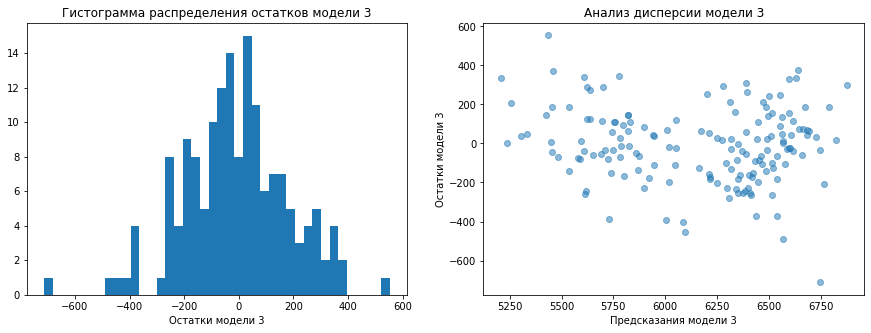

In [ ]:
X = ferma_main.drop(['id', 'удой,_кг', 'жирность,%', 'белок,%', 'вкус_молока', 'эке_(энергетическая_кормовая_единица)', \
                     'спо_(сахаро-протеиновое_соотношение)'], axis=1)
X.info()
print()
list_cat = list_cat+['имя_папы']
#list_col = ['эке_в_квадрате', 'сырой_протеин,_г']

encoder3, scaler3, model_lr3, predictions3 = learn_model_lin(X, y, list_cat, list_col, 3)

**Выводы по модели 3:**
- значение R² модели 0.80, это лучше (ближе к 1), чем модели 1 и 2;
- выводы из анализа остатков - распределение остатков близко к нормальному, но "лишние" пики и небольшие выбросы остались; интервал разброса предсказаний на диаграмме дисперсии сократился (и слева и справа).
- нужны ли дополнительные исследования - нет, из имеющихся данных мы уже получили возможные дополнительные признаки.

### Оценка качества каждой модели по трём метрикам: MSE, MAE, RMSE

Используем функции для расчёта метрик и найдём:
- лучшую модель;
- доверительный интервал прогноза лучшей модели

In [ ]:
def metriki(predictions, i=''):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print()
    print(f'MSE модели {i}, кв.кг:', round(mse, 1))
    print(f'MAE модели {i}, кг:', round(mae, 1))
    print(f'RMSE модели {i}, кг:', round(rmse, 1))
    #return mse, mae, rmse

metriki(predictions1, i=1)
metriki(predictions2, i=2)
metriki(predictions3, i=3)


MSE модели 1, кв.кг: 46380.3
MAE модели 1, кг: 169.1
RMSE модели 1, кг: 215.4

MSE модели 2, кв.кг: 39310.4
MAE модели 2, кг: 153.9
RMSE модели 2, кг: 198.3

MSE модели 3, кв.кг: 37065.5
MAE модели 3, кг: 148.8
RMSE модели 3, кг: 192.5


**Вывод о лучшей модели:**

Все 3 метрики (MSE, MAE, RMSE) у модели 3 меньше, а значит, у модели 3 меньше значения ошибок.

Поскольку R² у модели 3 тоже лучше (ближе к 1), чем у моделей 1 и 2, то **модель 3 - лучшая**.

Доверительный интервал для модели 3:

In [ ]:
print(np.quantile(predictions3, 0.025), np.quantile(predictions3, 0.975))

5329.656502016318 6749.416268364981


### С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить:

В датасет `cow_buy.csv` добавим недостающие признаки:
- ЭКЕ (Энергетическая кормовая единица)
- Сырой протеин, г
- СПО (Сахаро-протеиновое соотношение):

возьмём из датасета `ferma_main.csv` средние значения каждого из признаков и увеличим их на 5%

In [ ]:
#cow_buy.insert(1, 'сырой_протеин,_г', ferma_main['сырой_протеин,_г'].median() * 1.05)

cow_buy['эке'] = ferma_main['эке_(энергетическая_кормовая_единица)'].median() * 1.05
cow_buy['сырой_протеин,_г'] = ferma_main['сырой_протеин,_г'].median() * 1.05
cow_buy['спо'] = ferma_main['спо_(сахаро-протеиновое_соотношение)'].median() * 1.05

Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки

In [ ]:
cow_buy.loc[cow_buy['спо']<0.92, 'спо_бинарное'] = 'менее_0.92'
cow_buy.loc[cow_buy['спо']>0.92, 'спо_бинарное'] = 'более_0.92'
cow_buy['эке_в_квадрате'] = cow_buy['эке']**2

cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке,"сырой_протеин,_г",спо,спо_бинарное,эке_в_квадрате
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,1975.05,0.9765,более_0.92,238.239225
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,1975.05,0.9765,более_0.92,238.239225
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,1975.05,0.9765,более_0.92,238.239225
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,1975.05,0.9765,более_0.92,238.239225
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,1975.05,0.9765,более_0.92,238.239225


Порядок столбцов тренировочной выборки, на которой обучалась лучшая (3-я) модель:

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   сырой_протеин,_г  633 non-null    int64  
 1   порода            633 non-null    object 
 2   тип_пастбища      633 non-null    object 
 3   порода_папы_быка  633 non-null    object 
 4   возраст           633 non-null    object 
 5   спо_бинарное      633 non-null    object 
 6   эке_в_квадрате    633 non-null    float64
 7   имя_папы          633 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 44.5+ KB


Такой же порядок сделаем в выборке для прогноза:

In [ ]:
X_cow = pd.DataFrame()
X_cow['сырой_протеин,_г'] = cow_buy['сырой_протеин,_г']
X_cow['порода'] = cow_buy['порода']
X_cow['тип_пастбища'] = cow_buy['тип_пастбища']
X_cow['порода_папы_быка'] = cow_buy['порода_папы_быка']
X_cow['возраст'] = cow_buy['возраст']
X_cow['спо_бинарное'] = cow_buy['спо_бинарное']
X_cow['эке_в_квадрате'] = cow_buy['эке_в_квадрате']
X_cow['имя_папы'] = cow_buy['имя_папы']
X_cow2 = X_cow.copy() # копия для использования в лог.регрессии
X_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   сырой_протеин,_г  20 non-null     float64
 1   порода            20 non-null     object 
 2   тип_пастбища      20 non-null     object 
 3   порода_папы_быка  20 non-null     object 
 4   возраст           20 non-null     object 
 5   спо_бинарное      20 non-null     object 
 6   эке_в_квадрате    20 non-null     float64
 7   имя_папы          20 non-null     object 
dtypes: float64(2), object(6)
memory usage: 1.4+ KB


In [ ]:
X.columns==X_cow.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
list_cat

['порода',
 'тип_пастбища',
 'порода_папы_быка',
 'возраст',
 'спо_бинарное',
 'имя_папы']

In [ ]:
list_col

['сырой_протеин,_г', 'эке_в_квадрате']

In [ ]:
X_test_ohe = encoder3.transform(X_cow[list_cat])
try:
    encoder_col_names = encoder3.get_feature_names()
except:
    encoder_col_names = encoder3.get_feature_names_out()
X_test_scaler = scaler3.transform(X_cow[list_col])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaler = pd.DataFrame(X_test_scaler, columns=list_col)

X_cow = pd.concat([X_test_ohe, X_test_scaler], axis=1)

predictions_cow = model_lr3.predict(X_cow)

pd.DataFrame(predictions_cow)

,0
0,6610.025170
1,6358.650949
2,6298.244600
3,6613.027716
4,6560.443928
5,6397.006226
6,6610.025170
7,6578.477569
8,6298.244600
9,6393.201097


**Модель линейной регрессии предсказала**, что все 20 коров дадут удой свыше 6000 кг в год!

## Обучение модели логистической регрессии

Подготовим данные датасета `ferma_main.csv` и обучите на них модель `LogisticRegression`.

Используем в качестве целевого признак `Вкус молока`, преобразуем "вкусно" в 1, а "не вкусно" в 0

In [ ]:
y = ferma_main['вкус_молока'].copy()
y[y=='вкусно'] = 1
y[y=='не вкусно'] = 0
y = y.astype('int')
y.value_counts()

1    370
0    263
Name: вкус_молока, dtype: int64

Входные признаки (убираем целевой `вкус_молока` и `удой,_кг` а также `id`, `эке_(энергетическая_кормовая_единица)`, `спо_(сахаро-протеиновое_соотношение)` - вместо них будут ранее добавленные `эке_в_квадрате` и `спо_бинарное`):

In [ ]:
X = ferma_main.drop(['вкус_молока', 'удой,_кг', 'id', 'эке_(энергетическая_кормовая_единица)', \
                'спо_(сахаро-протеиновое_соотношение)'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   сырой_протеин,_г  633 non-null    int64  
 1   порода            633 non-null    object 
 2   тип_пастбища      633 non-null    object 
 3   порода_папы_быка  633 non-null    object 
 4   жирность,%        633 non-null    float64
 5   белок,%           633 non-null    float64
 6   возраст           633 non-null    object 
 7   спо_бинарное      633 non-null    object 
 8   эке_в_квадрате    633 non-null    float64
 9   имя_папы          633 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 54.4+ KB


Разбиваем данные на тренировочную и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

Кодируем категориальные признаки с помощью `OneHotEncoder`

In [ ]:
try:
    encoder = OneHotEncoder(drop='first', sparse=False)
except:
    encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_ohe = encoder.fit_transform(X_train[list_cat])
X_test_ohe = encoder.transform(X_test[list_cat])

try:
    encoder_col_names = encoder.get_feature_names()
except:
    encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Масштабируем количественные признаки с помощью `StandardScaler`

In [ ]:
list_col = ['сырой_протеин,_г', 'жирность,%', 'белок,%', 'эке_в_квадрате']

scaler = StandardScaler()

scaler.fit(X_train[list_col])
X_train_scaler = scaler.transform(X_train[list_col])
X_test_scaler = scaler.transform(X_test[list_col])

X_train_scaler = pd.DataFrame(X_train_scaler, columns=list_col)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=list_col)

Обучим модель логистической регрессии на подготовленных данных

In [ ]:
X_train = pd.concat([X_train_ohe, X_train_scaler], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaler], axis=1)

# создаём объект для работы с моделью
clf = LogisticRegression(random_state = 42)
# обучаем модель на данных
clf = clf.fit(X_train, y_train)
# получаем прогнозные метки классов
y_pred = clf.predict(X_test)
pd.Series(y_pred).value_counts()

1    123
0     36
dtype: int64

Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('accuracy:', acc)

recall = recall_score(y_test, y_pred)
print('recall:', recall)

precision = precision_score(y_test, y_pred)
print('precision:', precision)

accuracy: 0.6415094339622641
recall: 0.851063829787234
precision: 0.6504065040650406


Матрица ошибок:

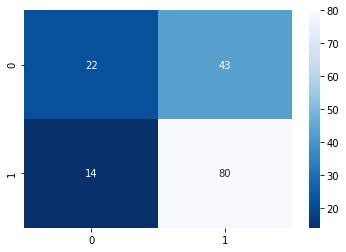

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

У нас класс 1 - вкусное молоко, класс 0 - невкусное. Модель делает 14 ошибок 2 рода и целых 43 ошибки 1 рода. Для нас критичны ошибки, когда невкусное молоко объявляется вкусным, т.е. предсказание 1 вместо реального 0, т.е. ошибки FP (False Positive) 1 рода. 43 таких ошибки надо свести к минимуму (повысить precision).

Изменим порог принадлежности к классам и ещё раз рассчитаем значения метрик recall и precision

In [ ]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 18,endpoint=False)] # 18 порогов

columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 0 if x<i else 1)
    print('recall_'+str(i)+':', recall_score(y_test, data['y_pred_'+str(i)]))
    print('precision_'+str(i)+':', precision_score(y_test, data['y_pred_'+str(i)]))
    print('Предсказаний вкусного молока', data['y_pred_'+str(i)].sum())
    print()

# выведем 5 случайных строк
print(pd.DataFrame(data.sample(5)))

recall_0.1: 1.0
precision_0.1: 0.5911949685534591
Предсказаний вкусного молока 159

recall_0.15: 1.0
precision_0.15: 0.5911949685534591
Предсказаний вкусного молока 159

recall_0.2: 1.0
precision_0.2: 0.5911949685534591
Предсказаний вкусного молока 159

recall_0.25: 0.9893617021276596
precision_0.25: 0.5886075949367089
Предсказаний вкусного молока 158

recall_0.3: 0.9680851063829787
precision_0.3: 0.5947712418300654
Предсказаний вкусного молока 153

recall_0.35: 0.9468085106382979
precision_0.35: 0.6013513513513513
Предсказаний вкусного молока 148

recall_0.4: 0.9148936170212766
precision_0.4: 0.6231884057971014
Предсказаний вкусного молока 138

recall_0.45: 0.8617021276595744
precision_0.45: 0.6090225563909775
Предсказаний вкусного молока 133

recall_0.5: 0.8085106382978723
precision_0.5: 0.6178861788617886
Предсказаний вкусного молока 123

recall_0.55: 0.648936170212766
precision_0.55: 0.6161616161616161
Предсказаний вкусного молока 99

recall_0.6: 0.5319148936170213
precision_0.6: 0

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 4,endpoint=False)] # 4 порога
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 0 if x<i else 1)
    print('recall_'+str(i)+':', recall_score(y_test, data['y_pred_'+str(i)]))
    print('precision_'+str(i)+':', precision_score(y_test, data['y_pred_'+str(i)]))
    print('Предсказаний вкусного молока', data['y_pred_'+str(i)].sum())
    print()

# выведем 5 случайных строк
print(data.sample(5))

recall_0.1: 1.0
precision_0.1: 0.5911949685534591
Предсказаний вкусного молока 159

recall_0.32: 0.9680851063829787
precision_0.32: 0.5986842105263158
Предсказаний вкусного молока 152

recall_0.55: 0.648936170212766
precision_0.55: 0.6161616161616161
Предсказаний вкусного молока 99

recall_0.78: 0.11702127659574468
precision_0.78: 0.7333333333333333
Предсказаний вкусного молока 15

     y_valid   y_proba  y_pred_0.1  y_pred_0.32  y_pred_0.55  y_pred_0.78
99         1  0.547982           1            1            0            0
156        0  0.618984           1            1            1            0
68         1  0.632530           1            1            1            0
116        1  0.840599           1            1            1            1
128        1  0.671440           1            1            1            0


Если задать 4 порога, то самый высокий precision = 0.73 получается при пороге 0.78 (модель делает ошибки 1 рода в 27% случаев, что много), хотя при стандартном пороге precision ещё меньше: 0,65. Но (забегая вперёд) самая высокая вероятность принадлежности к классу 1, предсказанная моделью - 0.7599, т.е. при пороге 0.78 ни одна корова не подходит.

Если задать 18 порогов, то самый высокий precision = 0.667 получается при пороге 0.75 (модель делает ошибки 1 рода в 23.3% случаев), зато порог позволяет нам выбрать хотя бы 1 корову.

С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить (датасет `cow_buy.csv`)

In [ ]:
X_cow3 = pd.DataFrame()
X_cow3['сырой_протеин,_г'] = X_cow2['сырой_протеин,_г']
X_cow3['порода'] = X_cow2['порода']
X_cow3['тип_пастбища'] = X_cow2['тип_пастбища']
X_cow3['порода_папы_быка'] = X_cow2['порода_папы_быка']
X_cow3['жирность,%'] = cow_buy['текущая_жирность,%']
X_cow3['белок,%'] = cow_buy['текущий_уровень_белок,%']
X_cow3['возраст'] = X_cow2['возраст']
X_cow3['спо_бинарное'] = X_cow2['спо_бинарное']
X_cow3['эке_в_квадрате'] = X_cow2['эке_в_квадрате']
X_cow3['имя_папы'] = X_cow2['имя_папы']
X_cow3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   сырой_протеин,_г  20 non-null     float64
 1   порода            20 non-null     object 
 2   тип_пастбища      20 non-null     object 
 3   порода_папы_быка  20 non-null     object 
 4   жирность,%        20 non-null     float64
 5   белок,%           20 non-null     float64
 6   возраст           20 non-null     object 
 7   спо_бинарное      20 non-null     object 
 8   эке_в_квадрате    20 non-null     float64
 9   имя_папы          20 non-null     object 
dtypes: float64(4), object(6)
memory usage: 1.7+ KB


In [ ]:
X.columns==X_cow3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
X_test_ohe = encoder.transform(X_cow3[list_cat])
try:
    encoder = OneHotEncoder(drop='first', sparse=False)
except:
    encoder = OneHotEncoder(drop='first', sparse_output=False)

X_test_scaler = scaler.transform(X_cow3[list_col])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaler = pd.DataFrame(X_test_scaler, columns=list_col)

X_cow3 = pd.concat([X_test_ohe, X_test_scaler], axis=1)

y_pred_log = clf.predict(X_cow3)
y_pred_log

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
y_pred_proba = clf.predict_proba(X_cow3)
y_pred_proba[:,1].max()

0.759900428600111

Максимальная вероятность принадлежности к классу 1 (вкусное молоко) 0.7599, и нам придётся подбирать порог, при котором precision выше, чем при стандартном, и чтобы этот порог не был выше максимальной вероятности. Если мы не найдём такой порог, придётся использовать предсказания модели при стандартном пороге с precision 0.65.

## Итоговые выводы

Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер:

In [ ]:
cow_buy['удой_прогноз_кг'] = predictions_cow
cow_buy['вкус_молока_вероятность'] = y_pred_proba[:,1]
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность,%       20 non-null     float64
 5   текущий_уровень_белок,%  20 non-null     float64
 6   возраст                  20 non-null     object 
 7   эке                      20 non-null     float64
 8   сырой_протеин,_г         20 non-null     float64
 9   спо                      20 non-null     float64
 10  спо_бинарное             20 non-null     object 
 11  эке_в_квадрате           20 non-null     float64
 12  удой_прогноз_кг          20 non-null     float64
 13  вкус_молока_вероятность  20 non-null     float64
dtypes: float64(8), object(6)
mem

Отберём коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко:

In [ ]:
cow_buy.query('удой_прогноз_кг>6000 and вкус_молока_вероятность>0.78')

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке,"сырой_протеин,_г",спо,спо_бинарное,эке_в_квадрате,удой_прогноз_кг,вкус_молока_вероятность


In [ ]:
cow_buy.query('удой_прогноз_кг>6000 and вкус_молока_вероятность>0.75')

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке,"сырой_протеин,_г",спо,спо_бинарное,эке_в_квадрате,удой_прогноз_кг,вкус_молока_вероятность
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.4,3.079,менее_2_лет,15.435,1975.05,0.9765,более_0.92,238.239225,6393.201097,0.7599


**Фермер может купить** с минимальным риском 1 корову, т.к.:
- спрогнозирован удой свыше 6000 кг в год при помощи модели, у которой все метрики (MSE, RMSE, MAE и R2) лучше, чем в 2 других моделях (в выбранной модели учтено больше признаков, т.е. максимально использованы имеющиеся данные);
- вероятность получить вкусное молоко выше порогового значения, при котором сводится к минимуму критическая ошибка (т.е. высока вероятность, что вкусное молоко спрогнозировано верно).

*Примечание: и это хорошо, что всем 20 коровам спрогнозирован удой выше 6000 кг, иначе и эта 1 корова могла бы не совпасть.*

**Рекомендации для фермера:**
- конкретизировать показатели "вкусного" молока,
- расширить выборку коров, из которых нужно выбрать лучших.

**Выводы** о моделях линейной регрессии и логистической регрессии.

Использованы способы улучшения качества регрессионной модели:
- удаление выбросов из данных,
- добавление новых признаков для устранения нелинейности,
- дополнительные признаки из датасета с быками.

Возможно ли ещё улучшить результаты регрессионной модели?
- при имеющихся данных не видно таких возможностей.

Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?
- recall и precision чем больше, тем точнее модель, но надо смотреть, какую ошибку надо минимизировать,
- матрица ошибок покажет количество ошибок 1 и 2 рода, чтобы минимизировать ту, которая критична в нашем случае.